In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/content/German_Credit_Card_Dataset.csv")

In [8]:
df.info

<bound method DataFrame.info of     checkin_acc  duration credit_history  amount savings_acc  \
0           A11         6            A34    1169         A65   
1           A12        48            A32    5951         A61   
2           A14        12            A34    2096         A61   
3           A11        42            A32    7882         A61   
4           A11        24            A33    4870         A61   
..          ...       ...            ...     ...         ...   
995         A14        12            A32    1736         A61   
996         A11        30            A32    3857         A61   
997         A14        12            A32     804         A61   
998         A11        45            A32    1845         A61   
999         A12        45            A34    4576         A62   

    present_emp_since  inst_rate personal_status  residing_since  age  \
0                 A75          4             A93               4   67   
1                 A73          2             A92               2   22   
2                 A74          2             A93               3   49   
3                 A74          2             A93               4   45   
4                 A73          3             A93               4   53   
..                ...        ...             ...             ...  ...   
995               A74          3             A92               4   31   
996               A73          4             A91               4   40   
997               A75          4             A93               4   38   
998               A73          4             A93               4   23   
999               A71          3             A93               4   27   

    inst_plans  num_credits   job  status  
0         A143            2  A173       0  
1         A143            1  A173       1  
2         A143            1  A172       0  
3         A143            1  A173       0  
4         A143            2  A173       1  
..         ...          ...   ...     ...  
995       A143            1  A172       0  
996       A143            1  A174       0  
997       A143            1  A173       0  
998       A143            1  A173       1  
999       A143            1  A173       0  

[1000 rows x 14 columns]>

In [4]:
df.shape

(1000, 14)

In [6]:
df.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


In [9]:
df.iloc[0:5,0:7]

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate
0,A11,6,A34,1169,A65,A75,4
1,A12,48,A32,5951,A61,A73,2
2,A14,12,A34,2096,A61,A74,2
3,A11,42,A32,7882,A61,A74,2
4,A11,24,A33,4870,A61,A73,3


In [10]:
df.iloc[0:5,7:15]

,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A93,4,67,A143,2,A173,0
1,A92,2,22,A143,1,A173,1
2,A93,3,49,A143,1,A172,0
3,A93,4,45,A143,1,A173,0
4,A93,4,53,A143,2,A173,1


In [11]:
df['checkin_acc'].unique()

array(['A11', 'A12', 'A14', 'A13'], dtype=object)

In [12]:
x_features=list(df.columns)
x_features.remove('status')
encodede_df=pd.get_dummies(df[x_features],drop_first=True)
print(list(encodede_df.columns))

['duration', 'amount', 'inst_rate', 'residing_since', 'age', 'num_credits', 'checkin_acc_A12', 'checkin_acc_A13', 'checkin_acc_A14', 'credit_history_A31', 'credit_history_A32', 'credit_history_A33', 'credit_history_A34', 'savings_acc_A62', 'savings_acc_A63', 'savings_acc_A64', 'savings_acc_A65', 'present_emp_since_A72', 'present_emp_since_A73', 'present_emp_since_A74', 'present_emp_since_A75', 'personal_status_A92', 'personal_status_A93', 'personal_status_A94', 'inst_plans_A142', 'inst_plans_A143', 'job_A172', 'job_A173', 'job_A174']


In [15]:
x=encodede_df
y=df['status']

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='gini',max_depth=3)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [18]:
pred_y=clf.predict(x_test)

In [20]:
from sklearn import metrics
print("Confusion matrix is \n",metrics.confusion_matrix(y_test,pred_y))
print("Accuracy is \n",metrics.accuracy_score(y_test,pred_y))
print("AUC Score is", metrics.roc_auc_score(y_test,pred_y))

Confusion matrix is 
 [[198  11]
 [ 71  20]]
Accuracy is 
 0.7266666666666667
AUC Score is 0.5835743204164258


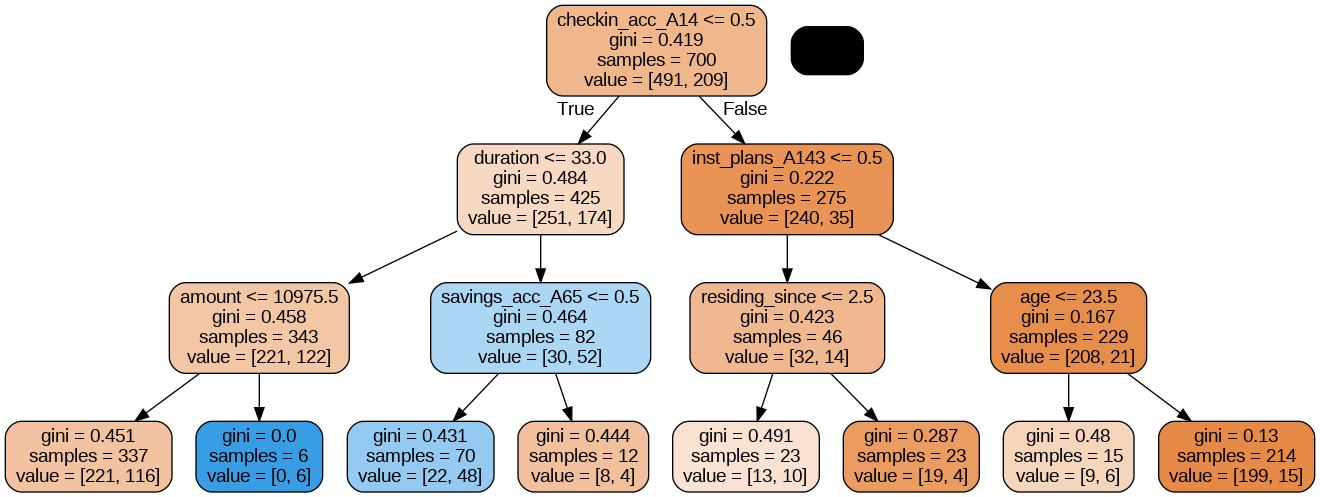

In [21]:
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image
export_graphviz(clf,out_file='tree.odt',feature_names=list(x_train.columns),filled=True,rounded=True)
graph=pdot.graphviz.graph_from_dot_file('tree.odt')
graph.write_jpg("tree.png")
Image(filename="tree.png")